# TensorFlow Development

-----

## Introduction

### Tensor

TensorFlow's fundamental data structure is the __tensor__, which is an N-dimensional array of elements.

All of the elements in a tensor have to be the same type and these elements can be numbers, strings, or Boolean values.

### Converting Tensors to Ndarrays are Crucial
Tensors have a lot in common with NumPy's __ndarrays__, particularly with regard to their elements and functions. Also, converting tensors to ndarrays is a crucial operation in many applications. 

------

### Tensor Property

Every tensor has a property called its shape, which is an array containing the sizes of the tensor's dimensions. 

### 1D Tensor
Therefore, if a one-dimensional tensor contains three values, its shape will contain a single element, three. 

### 2D Tensor
If a two-dimensional tensor contains two rows and four columns, its shape will contain two elements, two and four.

### Note on dimension structures
Note that __a one-dimensional tensor is usually called a vector__ and __a two-dimensional tensor is usually called a matrix__. 

A __zero-dimensional__ tensor contains a single value and is commonly called a __scalar__. 

### Data Type
In addition to having a shape, every tensor has a TensorFlow specific data type. This is actually the data type of the tensor's elements. So if a tensor contains Boolean values, its type will be __tf.bool__. Most of the TensorFlow types are numeric. And like NumPy's data types, the __main differences between them involve fixed-point of floating-point, signed or unsigned, and a number of bits per element__. 

For example, a tensor containing 16 bit unsigned integers will have a type of tf.uint16. A tensor containing 64 bit floating-point values will have a type of tf.float64. 

Most common tensor type is tf.float32, which means the tensors contain 32 bit floating-point values.

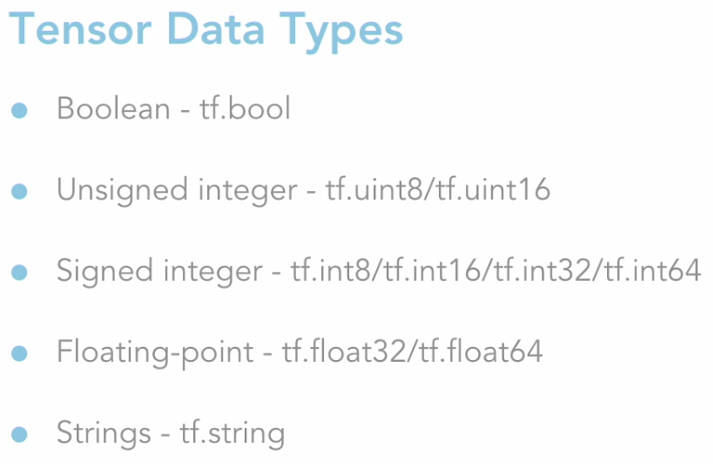

In [2]:
from PIL import Image
Image.open('Images/02-data-types.png')

------

### How do you create a tensor?

The simplest way to create a tensor is to call __tf.constant__ with a list of values. 

This slide presents four different ways of calling this function. 

1. The first line creates t1, a one-dimensional floating-point tensor containing three values. 


2. The second line creates a two-dimensional string tensor named t2 which contains two rows of four values each. Similarly, t3 is a two-dimensional Boolean value containing two rows of two values each. You can control a tensor's type by setting the dtype parameter of tf.constant. 


3. In the last line, dtype is set to tf.uint8 which means t4 will contain eight bit unsigned values. 




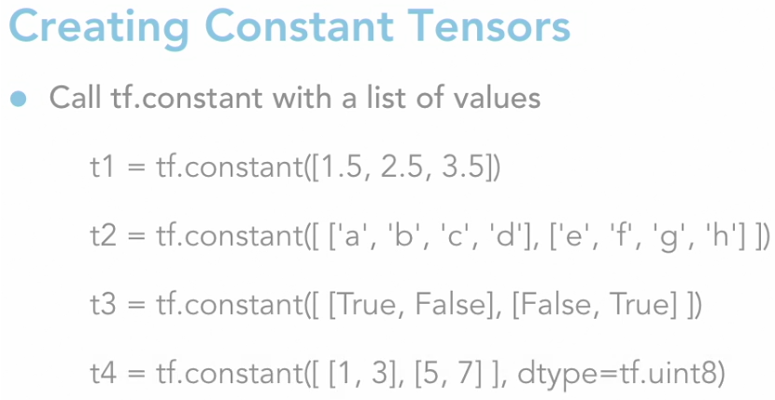

In [1]:
Image.open('Images/01-tensors.png')

### Randomized Tensors
In addition to creating tensors with known values, you can create tensors containing random values. If you want to create a tensor containing normally distributed values, it's important to be familiar with the bell curve which I've illustrated in this slide. If values are normally distributed, the majority of them will be located close to the mean, or average value. The average distance from the mean to one of the values is called the standard deviation. In a normal distribution, 68.2% of the values lie within one standard deviation from the mean. 95.4% of the values lie within two standard deviations from the mean. You can create tensors containing normally distributed values by calling one of two functions. 

    Tf.random_normal
    tf.truncated_normal
    
The difference between the two is the __tf.truncated_normal__ limits the generated values to those lying within two standard deviations of the mean. This is helpful when you wanna generate random test values but you don't wanna deal with outliers. 

TensorFlow also provides the __tf.random uniform__ function which creates a TensorFlow containing uniformly distributed values. This accepts a _minval_ parameter and a _maxval_ parameter. And because the tensor's elements are uniformly distributed, each value between minval and maxval is equally likely to be generated. 

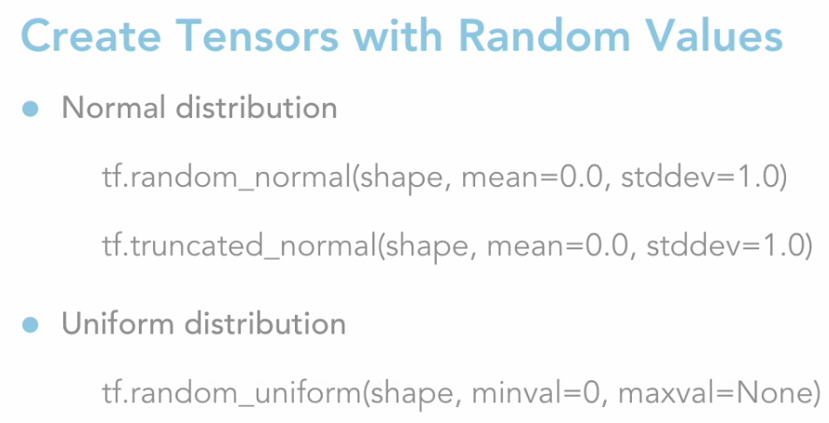

In [3]:
Image.open('Images/03-random.png')

---------

## Tensor Operations: shape & reshape

Tf.shape accepts a tensor and returns its shape, so if you call the function with the tensor containing a 2x3 matrix, it will return a vector containing 2 and 3. 

Many machine learning applications, particularly those that process images, need to reshape tensors without changing the number of elements. This can be accomplished with __tf.reshape__ which converts a tensor to a given shape. In this example, tf.reshape accepts a two-by-three matrix and returns a sixth element vector containing the same values. 

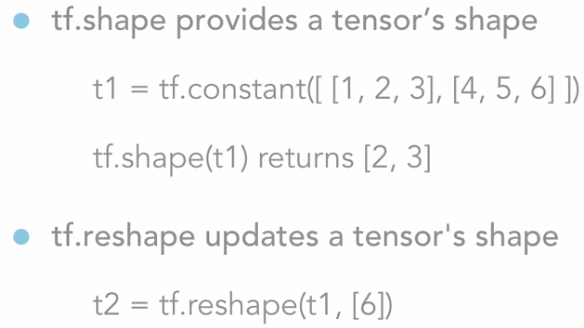

In [4]:
Image.open('Images/04-reshape.png')

### Extracting Data from a Tensor

The easiest way to extract elements from a tensor is use Python's list notation. Just follow the tensor's name when square brackets containing an index or indices. As in regular Python, you can represent a range of indices using a colon. 

You can extract a subtensor or slice by calling __tf.slice__. This accepts three parameters and the first is the tensor containing the elements to be extracted. The second parameter, begin, identifies the location of the first element to be extracted. The last parameter, size, identifies the size of the desired slice. 

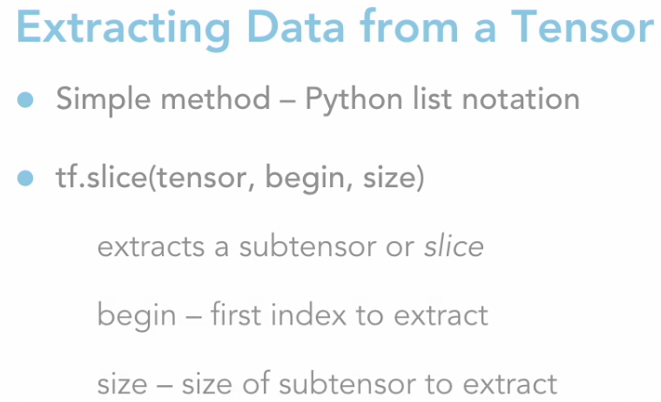

In [5]:
Image.open('Images/05-extract.png')

This slide presents an example of how tf.slice can be used. Suppose we have a three-by-three matrix and we want to extract the two-by-two matrix in the lower right. 

We can call tf.slice with begin parameters set to one, one because that's the location of the first element we want to extract. The size parameter should be set to two, two because that's the shape of the slice we want. 

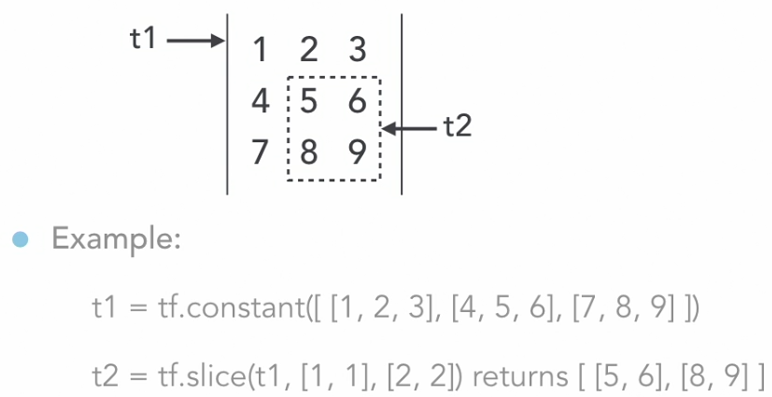

In [6]:
Image.open('Images/06-extract-ex.png')

### Minimum/Maximum vs. ArgMin/ArgMax

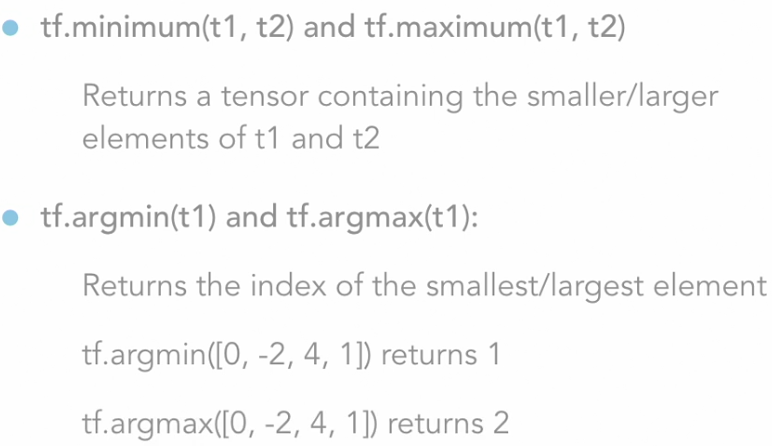

In [7]:
Image.open('Images/07-minmax.png')

### Vector / Matrix Operations

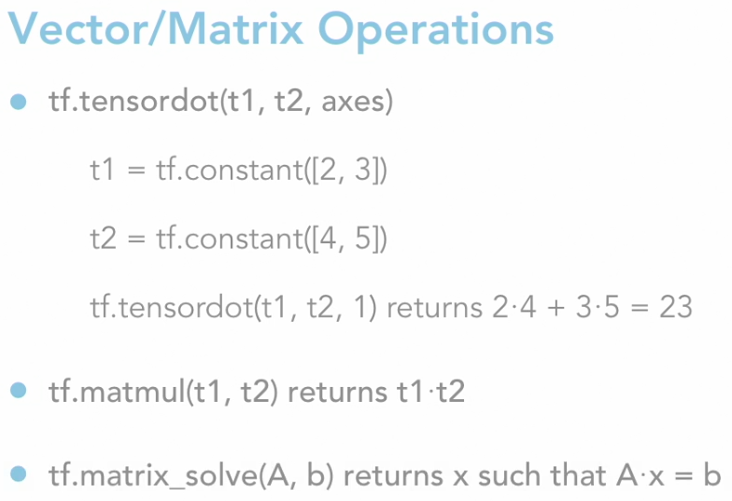

In [8]:
Image.open('Images/08-matrix.png')

### Reduction Operations
 
 These process the elements in a tensor and return the single value. 

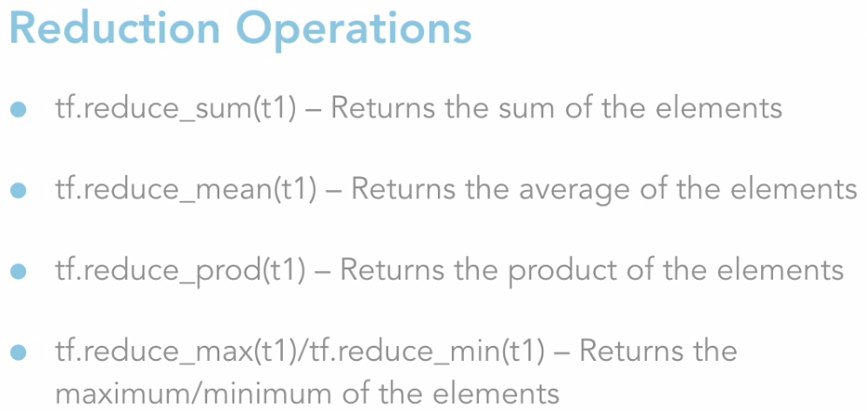

In [9]:
Image.open('Images/09-reduction.png')

## Understanding Graphs & Sessions

TensorFlow applications tensor operations are not executed immediately. Instead the interpreter stores the tensors and their operations in a data structure called a graph. For example, suppose your application adds two tensors named a and b and then multiplies their sum by a tensor named c. When the interpreter encounters these operations it will construct the graph illustrated in this image. 

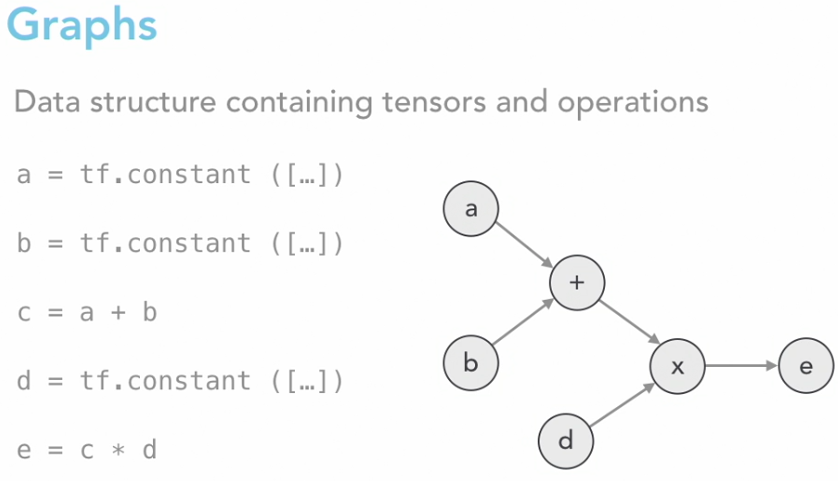

In [10]:
Image.open('Images/10-graphs.png')

 As illustrated, each circle identifies a tensor or operation and each line transfers tensor data. Mathematicians and computer scientists refer to this structure of nodes and edges as a graph. The graph circles are called nodes and the straight lines are called edges.

### Graph Functions

 When you code operations with tensors TensorFlow automatically creates an instance of the graph class to store them. This active graph is called the default graph and you can access it in code by calling tf.get_default_graph.

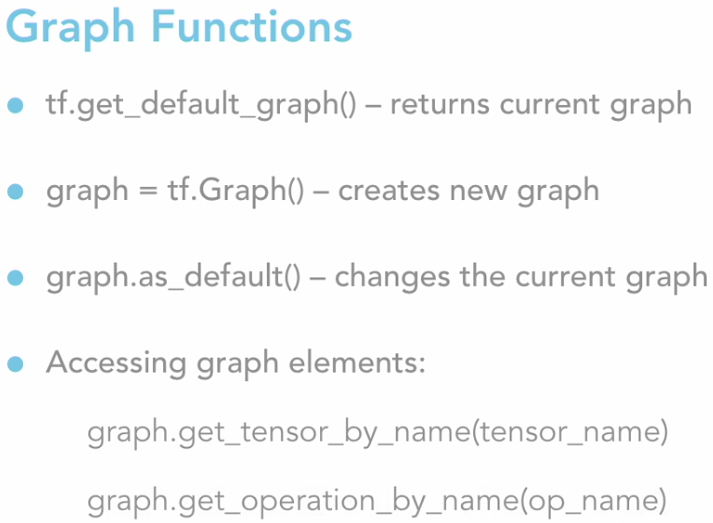

In [11]:
Image.open('Images/11-graph-function.png')

### Sessions

 TensorFlow does not create a default session so applications need to create their own by calling __tf.Session__. If you call tf.Session without parameters the session will be associated with the default graph. But if you set the graph parameter to a specific graph, the session will look for operations in that graph. It's common to call tf.Session inside a with statement. 

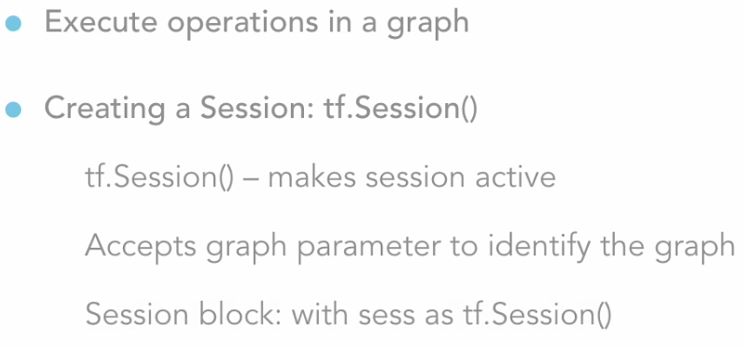

In [12]:
Image.open('Images/12-sessions.png')

### Execute a Session

 To execute operations in a graph you need to call the session's run method. The method's first parameter identifies what you want to run and you can set this to a tensor, an operation, or a list of tensors or operations.

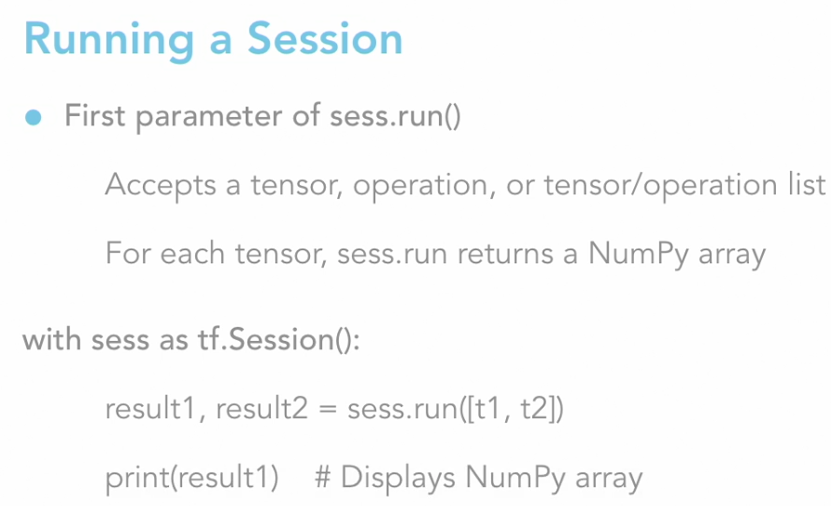

In [14]:
Image.open('Images/13-run-session.png')

### Enable Eage Execution for testing and debugging: tf.enable_eager_execution()

------------

## Tensor/Graph/Session Demo

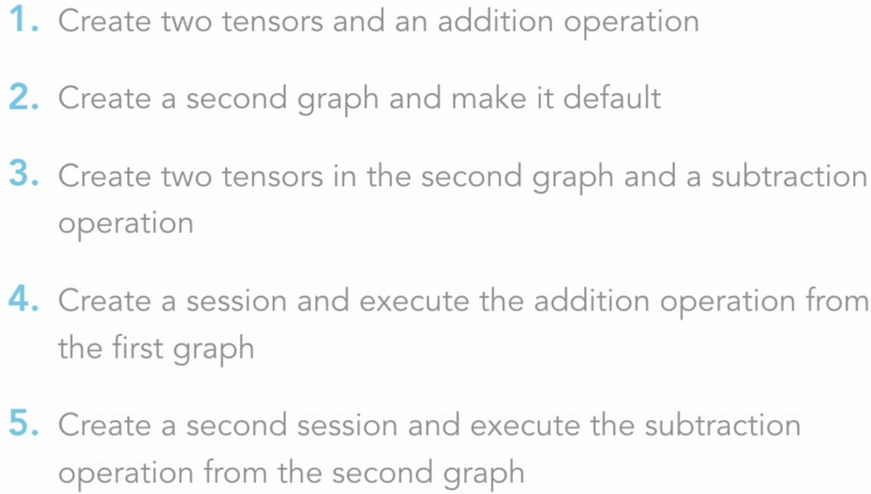

In [15]:
Image.open('Images/14-demo.png')

### Create tensors and graph

In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

# Create two tensors and an addition operation
t1 = tf.constant([1.2, 2.3, 3.4, 4.5])
t2 = tf.random_normal([4])
t3 = t1 + t2
graph1 = tf.get_default_graph()

### Create a second graph and make it the default graph

 Inside the statement, every new tensor and every new operation will be added to graph2 instead of graph1.

In [18]:
# Create a second graph and make it the default graph
graph2 = tf.Graph()

with graph2.as_default():
    t4 = tf.constant([5.6, 6.7, 7.8, 8.9])
    t5 = tf.random_normal([4])
    t6 = t4 - t5

### Create a session and execute the addition operation from the first graph

 So for the first session, I wanna associate it with the first graph, so that I can execute the addition. So I'm going to create a with statement, and call tf.session with its graph parameter equal to graph1. And I'm going to refer to this graph as sess.
 
  Now, because I've called sess.run with t3, when the session executes, it's going to execute the operation given by t3, which adds t1 and t2.

In [19]:
# Create a session and execute the addition operation from the first graph
with tf.Session(graph=graph1) as sess:
    print('Addition ', sess.run(t3))

Addition  [0.18810296 0.6411648  4.3251257  4.905133  ]


### Create a second session and execute the subtraction operation from the second graph

I'm going to call sess.run with t6. In this case, when the session runs, it's going to access the t6 tensor from the second graph

In [20]:
# Create a second session and execute the subtraction operation from the second graph
with tf.Session(graph=graph2) as sess:
    print('Subtraction ', sess.run(t6))

Subtraction  [5.3302045 6.821967  8.979915  9.023828 ]
